In [1]:
import requests
import csv
import urllib.parse
import re
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from plotnine import *

In [ ]:
#naver blog
serch = input()
purl = urllib.parse.quote_plus(serch)
url = f'https://search.naver.com/search.naver?query={purl}&nso=&where=blog&sm=tab_viw.all'

In [2]:
my_useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36"
my_h = {"User-Agent":my_useragent}

In [3]:
#coupang
kword = input("key word :")
pnum=input("page number: ")
prods = []
ckword = urllib.parse.quote_plus(kword)
url=f'https://www.coupang.com/np/search?q={ckword}&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={pnum}&rocketAll=false&searchIndexingToken=1=4&backgroundColor='


key word :노트북
page number: 5


In [ ]:
# homeinfo = urllib.request.urlopen(url).read()
res=requests.get(url,headers=my_h)

res.raise_for_status()
soup = BeautifulSoup(res.text,'html.parser')

In [4]:
for j in range(int(pnum)):
    url=f'https://www.coupang.com/np/search?q={ckword}&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={j}&rocketAll=false&searchIndexingToken=1=4&backgroundColor='
    res=requests.get(url,headers=my_h)
    soup = BeautifulSoup(res.text,'html.parser')
    prod = soup.select('.search-product-wrap')
    item_len = len(prod)

    for i in range(item_len):
        temp = []
        if prod[i].select('.star .rating'):
            r = float(prod[i].select('.star .rating')[0].get_text())
            rp = int(prod[i].select('.rating-total-count')[0].get_text()[1:-1])
            if r < 4.5 or rp < 100:
                continue
        else:
            continue
        if prod[i].select('.name') is not None:
            temp.append(prod[i].select('.name')[0].get_text())
        else:
            temp.append('')

        if prod[i].select('.price-value') is not None:
            temp.append(prod[i].select('.price-value')[0].get_text())
        else:
            temp.append('')

        if prod[i].select('.star .rating'):
            temp.append(prod[i].select('.star .rating')[0].get_text())
            temp.append(prod[i].select('.rating-total-count')[0].get_text()[1:-1])
        else:
            temp.append('')
            temp.append('')
        prods.append(temp)


In [ ]:
prod = soup.select('.search-product-wrap')
item_len = len(prod)

for i in range(item_len):
    temp = []
    if prod[i].select('.star .rating'):
        r = float(prod[i].select('.star .rating')[0].get_text())
        rp = int(prod[i].select('.rating-total-count')[0].get_text()[1:-1])
        if r < 4.5 or rp < 100:
            continue
#     else:
#         continue
    if prod[i].select('.name') is not None:
        temp.append(prod[i].select('.name')[0].get_text())
    else:
        temp.append('')
        
    if prod[i].select('.sale') is not None:
        temp.append(prod[i].select('.sale')[0].get_text())
    else:
        temp.append('')
        
    if prod[i].select('.star .rating'):
        temp.append(prod[i].select('.star .rating')[0].get_text())
        temp.append(prod[i].select('.rating-total-count')[0].get_text()[1:-1])
    else:
        temp.append('')
        temp.append('')
    
#     print(temp)
#     print(i)
    prods.append(temp)



In [5]:
f = open(kword+"2.csv","w",encoding="utf-8",newline="")
csvwriter = csv.writer(f)
header=['Name','Price','Rate','Rating_pop']
csvwriter.writerow(header)
for i in prods:
    csvwriter.writerow(i)
f.close()

In [ ]:
li = []
items=soup.find_all("li",attrs={"class":re.compile("^search-product")}) #정규식을 사용하면서 시작표시인 삿갓표시(^)를 함. 
for item in items:
    temp=[]
    name=item.find("div",attrs={"class":"name"}).get_text() #제품명
    price=item.find("em",attrs={"class":"sale"}).get_text() #가격
    rate=item.find("em",attrs={"class":"rating"}) #평점
    rate_cnt=item.find("span",attrs={"class":"rating-total-count"}) # 평점 수
    if rate:
        rate=rate.get_text()
        rate_cnt=rate_cnt.get_text()[1:-1]
    else:
        rate="평점 정보없음"
        rate_cnt="평점수가 없음"

    temp.append(name)
    temp.append(price)
    temp.append(rate)
    temp.append(rate_cnt)
    li.append(temp)



In [ ]:
#naver blog
lit2 = []
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36"}
pnum = int(input("input blogs number(max 30): "))
for i in range(1):
    #html = urllib.request.urlopen(Request(url, headers={'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36"})).read()
    for j in range(pnum):
        temp = []
        date = soup.select('.sub_time.sub_txt')[j].get_text()
        where = soup.select('.sub_txt.sub_name')[j].get_text()
        tit = soup.select('.api_txt_lines.total_tit')[j].get_text()
        hline = soup.select('.api_txt_lines.dsc_txt')[j].get_text()
        link = soup.select('.api_txt_lines.total_tit')[j]['href']
        temp.append(tit)
        temp.append(date)
        temp.append(where)
        temp.append(hline)
        temp.append(link)
        lit2.append(temp)

f = open(serch+".csv","w",encoding="utf-8",newline="")
csvwriter = csv.writer(f)
header=['Title','date','from','headline','url']
csvwriter.writerow(header)
for i in lit2:
    csvwriter.writerow(i)
f.close()

In [7]:
import pandas as pd

data = pd.read_csv(kword+'2.csv')
data.head(10)

,Name,Price,Rate,Rating_pop
0,대용량 SSD 512G탑재! 삼성전자 노트북9 NT901X5H (코어i5 RAM 8...,"698,000",4.5,118
1,삼성전자 플러스 퓨어 화이트 노트북 NT350XCR-AD3AW (i3-10110U)...,"819,000",5.0,427
2,삼성전자 플러스2 퓨어화이트 노트북 NT550XDA-K78AW (i7-1165G7 ...,"1,379,000",5.0,806
3,삼성전자 갤럭시북 이온2 미스틱화이트 노트북 NT950XDA-X71OW (i7-11...,"2,099,000",5.0,145
4,"Apple 2020년 맥북 프로 13 (M1 칩셋 8코어 CPU 8코어 GPU), ...","2,116,200",5.0,569
5,삼성전자 노트북9 METAL NT901X5L 가볍고 슬림한 1.29kg 코어i5 S...,"669,000",4.5,496
6,LG전자 2020 그램15 노트북 15Z90N-VR56K (i5-1035G7 39....,"1,593,130",5.0,108
7,레노버 아이디어패드 Platinum Grey 노트북 S150-11 81VT (Int...,"275,800",4.5,110
8,삼성전자 플러스 퓨어 화이트 노트북 NT350XCR-AD3AW (i3-10110U)...,"889,000",5.0,427
9,"Apple 2020년 맥북 에어 13, M1 8-Core, 8GB, SSD 256G...","1,182,890",5.0,804


<Figure size 432x288 with 0 Axes>

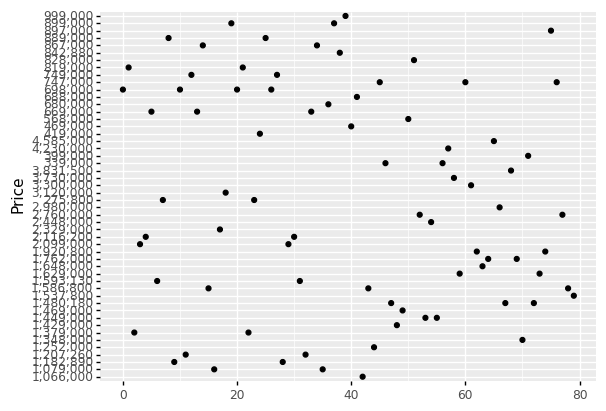

<ggplot: (166003561864)>

In [11]:
fig = plt.figure()

ggplot(data, aes(x=data.index,y='Price'))\
    +geom_point()
